# ノック31 : データ読み込み

In [1]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [2]:
customer = pd.read_csv('customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

# ノック32 : クラスタリング

In [3]:
# create dataset for clustering
customer_clustering = customer[['mean', 'median', 'max', 'min', 'membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [4]:
# execute k-means clustering

## load library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # for variable standardization

## standardization
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)
## additional : check mean and variance of standardized variables
print(customer_clustering_sc,
      customer_clustering_sc.mean(axis=0),
      customer_clustering_sc.var(axis=0))

## execute clustering
kmeans = KMeans(n_clusters = 4, random_state = 0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering['cluster'] = clusters.labels_
print(customer_clustering['cluster'].unique())
customer_clustering.head()

[[-0.28120614 -0.13367635  0.08117747 -0.5336197   2.03402524]
 [-0.14054502 -0.13367635 -0.37992814 -0.02114919  2.03402524]
 [-0.42186727 -0.13367635 -0.84103375 -0.02114919  2.03402524]
 ...
 [ 1.50050144  1.46662237  0.08117747  2.54120338 -1.28811491]
 [ 3.18843493  3.06692109  1.46449428  4.07861492 -1.28811491]
 [ 2.62579043  2.53348819  1.00338868  3.56614441 -1.28811491]] [ 2.16959614e-16  1.35599759e-16 -5.42399035e-17 -1.08479807e-16
 -5.42399035e-17] [1. 1. 1. 1. 1.]
[3 1 0 2]


C:\Users\YusukeSato\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


# ノック33 : クラスタリング結果の分析

In [5]:
customer_clustering.columns = ['月内平均値', '月内中央値', '月内最大値', '月内最小値', '会員期間', 'cluster']
customer_clustering.groupby('cluster').count()

# note
## k-means clustering uses random number, so the result is not exactrly consistent with original code.
## but the tendency of the result is same.
## if you want to fix the result, you should use seed
## reference : http://blog.somof.net/?p=1064

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,1336,1336,1336,1336,1336
1,761,761,761,761,761
2,846,846,846,846,846
3,1249,1249,1249,1249,1249


In [6]:
customer_clustering.groupby('cluster').mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,5.522518,5.373129,8.743263,2.686377,14.831587
1,3.051243,2.885677,4.750329,1.653088,9.269382
2,8.054608,8.039598,10.009456,6.160757,7.072104
3,4.677494,4.671337,7.232986,2.153723,36.915933


# ノック34 : クラスタリング結果の可視化

In [7]:
# load library for PCA
## dimension reduction for plot
from sklearn.decomposition import PCA

X = customer_clustering_sc
pca = PCA(n_components = 2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']

In [8]:
pca_df

,0,1,cluster
0,-0.819982,-1.959097,3
1,-0.707922,-1.799857,3
2,-1.061499,-1.659826,3
3,-1.160764,-1.810139,3
4,-2.017132,-1.670101,3
...,...,...,...
4187,3.027933,1.139635,2
4188,5.064720,0.769684,2
4189,3.027933,1.139635,2
4190,6.083114,0.584708,2


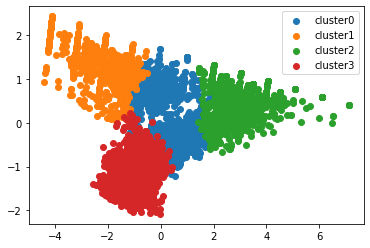

In [9]:
# visualization
import matplotlib.pyplot as plt
%matplotlib inline

for i in sorted(customer_clustering['cluster'].unique()):  # add sort reference : https://note.nkmk.me/python-list-sort-sorted/
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1], label = 'cluster'+str(i))  # add legend
plt.legend()
    
# cluster0 and 1 are very close. they are long term customer groups.

In [48]:
customer_clustering.columns[:5]

Index(['月内平均値', '月内中央値', '月内最大値', '月内最小値', '会員期間'], dtype='object')

In [50]:
# added in 2020.12.12
# deep understand of PCA result
# reference : https://qiita.com/maskot1977/items/082557fcda78c4cdb41f
pd.DataFrame(pca.components_, columns = customer_clustering.columns[:5], index = ['PC{}'.format(x + 1) for x in range(2)])

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
PC1,0.532650,0.513845,0.441831,0.470014,-0.190050
PC2,-0.109719,-0.149198,-0.236745,0.127829,-0.945153


Text(0, 0.5, 'PC2')

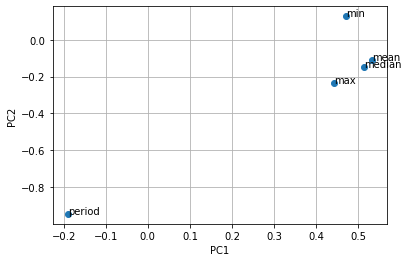

In [56]:
# plot components
names = ["mean", 'median', 'max', 'min', 'period']
for x, y, name in zip(pca.components_[0], pca.components_[1], names):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')

# ノック35 : 顧客傾向の把握

In [10]:
customer_clustering = pd.concat([customer_clustering, customer], axis = 1)
customer_clustering.groupby(['cluster', 'is_deleted'], as_index = False).count()[['cluster', 'is_deleted', 'customer_id']]

# the result is a little bit different from original code.
# cluster3 has no customer whose is_deleted = 0

,cluster,is_deleted,customer_id
0,0,0,785
1,0,1,551
2,1,1,761
3,2,0,827
4,2,1,19
5,3,0,1230
6,3,1,19


In [11]:
customer_clustering.groupby(['cluster', 'routine_flg'], as_index = False).count()[['cluster', 'routine_flg', 'customer_id']]

,cluster,routine_flg,customer_id
0,0,0,229
1,0,1,1107
2,1,0,496
3,1,1,265
4,2,0,52
5,2,1,794
6,3,0,2
7,3,1,1247


# ノック36 : 予測の準備

In [12]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['年月'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['年月', 'customer_id'], as_index = False).count()
uselog_months.rename(columns={'log_id':'count'}, inplace = True)
del uselog_months['usedate']
uselog_months.head()

# count visit number for each customer and each month

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [13]:
year_months = list(uselog_months['年月'].unique())
predict_data = pd.DataFrame()
for i in range(6, len(year_months)):
    tmp = uselog_months.loc[uselog_months['年月'] == year_months[i]]
    tmp.rename(columns = {'count':'count_pred'}, inplace = True)
    for j in range(1,7):
        tmp_before = uselog_months.loc[uselog_months['年月'] == year_months[i-j]]
        del tmp_before['年月']
        tmp_before.rename(columns = {'count':'count_{}'.format(j-1)}, inplace = True)
        tmp = pd.merge(tmp, tmp_before, on = 'customer_id', how = 'left')
    predict_data = pd.concat([predict_data, tmp], ignore_index = True)
predict_data.head()

C:\Users\YusukeSato\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [14]:
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop = True)
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


# ノック37 : 特徴量を追加

In [15]:
predict_data = pd.merge(predict_data, customer[['customer_id', 'start_date', ]], on = 'customer_id', how = 'left')
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [16]:
predict_data['now_date'] = pd.to_datetime(predict_data['年月'], format = '%Y%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])

from dateutil.relativedelta import relativedelta

predict_data['period'] = None
for i in range(len(predict_data)):
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
    predict_data['period'][i] = delta.years*12 + delta.months
predict_data.head()

C:\Users\YusukeSato\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


# ノック38 : 予測モデルを作る

In [17]:
predict_data = predict_data.loc[predict_data['start_date'] >= pd.to_datetime('20180401')]

from sklearn import linear_model
import sklearn.model_selection

model = linear_model.LinearRegression()
X = predict_data[['count_0', 'count_1', 'count_2', 'count_3', 'count_4', 'count_5', 'period']]
y = predict_data['count_pred']

# data devide
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
model.fit(X_train, y_train)

# simple linear regression

LinearRegression()

In [18]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6071051425804155
0.6079167312105399


In [19]:
# play more model!
# add mean, gender, campaign type, class
predict_data_2 = pd.merge(predict_data, customer[['customer_id', 'mean', 'routine_flg', 'gender', 'campaign_id', 'class_name']], on = 'customer_id', how = 'left')

# one-hot encoding
# https://blog.shikoan.com/pandas-get-dummies/
predict_data_2 = pd.get_dummies(predict_data_2, columns=['gender', 'campaign_id', 'class_name'], drop_first=True)
predict_data_2.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period,mean,routine_flg,gender_M,campaign_id_CA2,campaign_id_CA3,class_name_デイタイム,class_name_ナイト
0,201810,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5,3.800000,0,0,0,1,1,0
1,201810,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5,8.250000,1,1,0,1,0,1
2,201810,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5,4.900000,1,0,0,1,0,0
3,201810,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5,5.200000,1,0,0,1,0,0
4,201810,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5,3.666667,0,0,0,1,1,0


In [20]:
model_2 = linear_model.LinearRegression()
X2 = predict_data_2[['count_0', 'count_1', 'count_2', 'count_3', 'count_4', 'count_5', 'period', 'mean','routine_flg', 'gender_M', 'campaign_id_CA2', 'campaign_id_CA3', 'class_name_デイタイム', 'class_name_ナイト']]
y2 = predict_data_2['count_pred']

# data devide
X2_train, X2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X2, y2)
model_2.fit(X2_train, y2_train)

print(model_2.score(X2_train, y2_train))
print(model_2.score(X2_test, y2_test))

# score improved by adding 'mean'

0.7321440385003786
0.7356191623478849


# ノック38_2 : 特徴量間の関係を見る

In [21]:
# use seaborn
import seaborn as sns

In [22]:
predict_data_v = pd.merge(predict_data, customer[['customer_id', 'mean', 'routine_flg', 'gender', 'campaign_id', 'class_name']], on = 'customer_id', how = 'left')
predict_data_v.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period,mean,routine_flg,gender,campaign_id,class_name
0,201810,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5,3.800000,0,F,CA3,デイタイム
1,201810,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5,8.250000,1,M,CA3,ナイト
2,201810,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5,4.900000,1,F,CA3,オールタイム
3,201810,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5,5.200000,1,F,CA3,オールタイム
4,201810,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5,3.666667,0,F,CA3,デイタイム


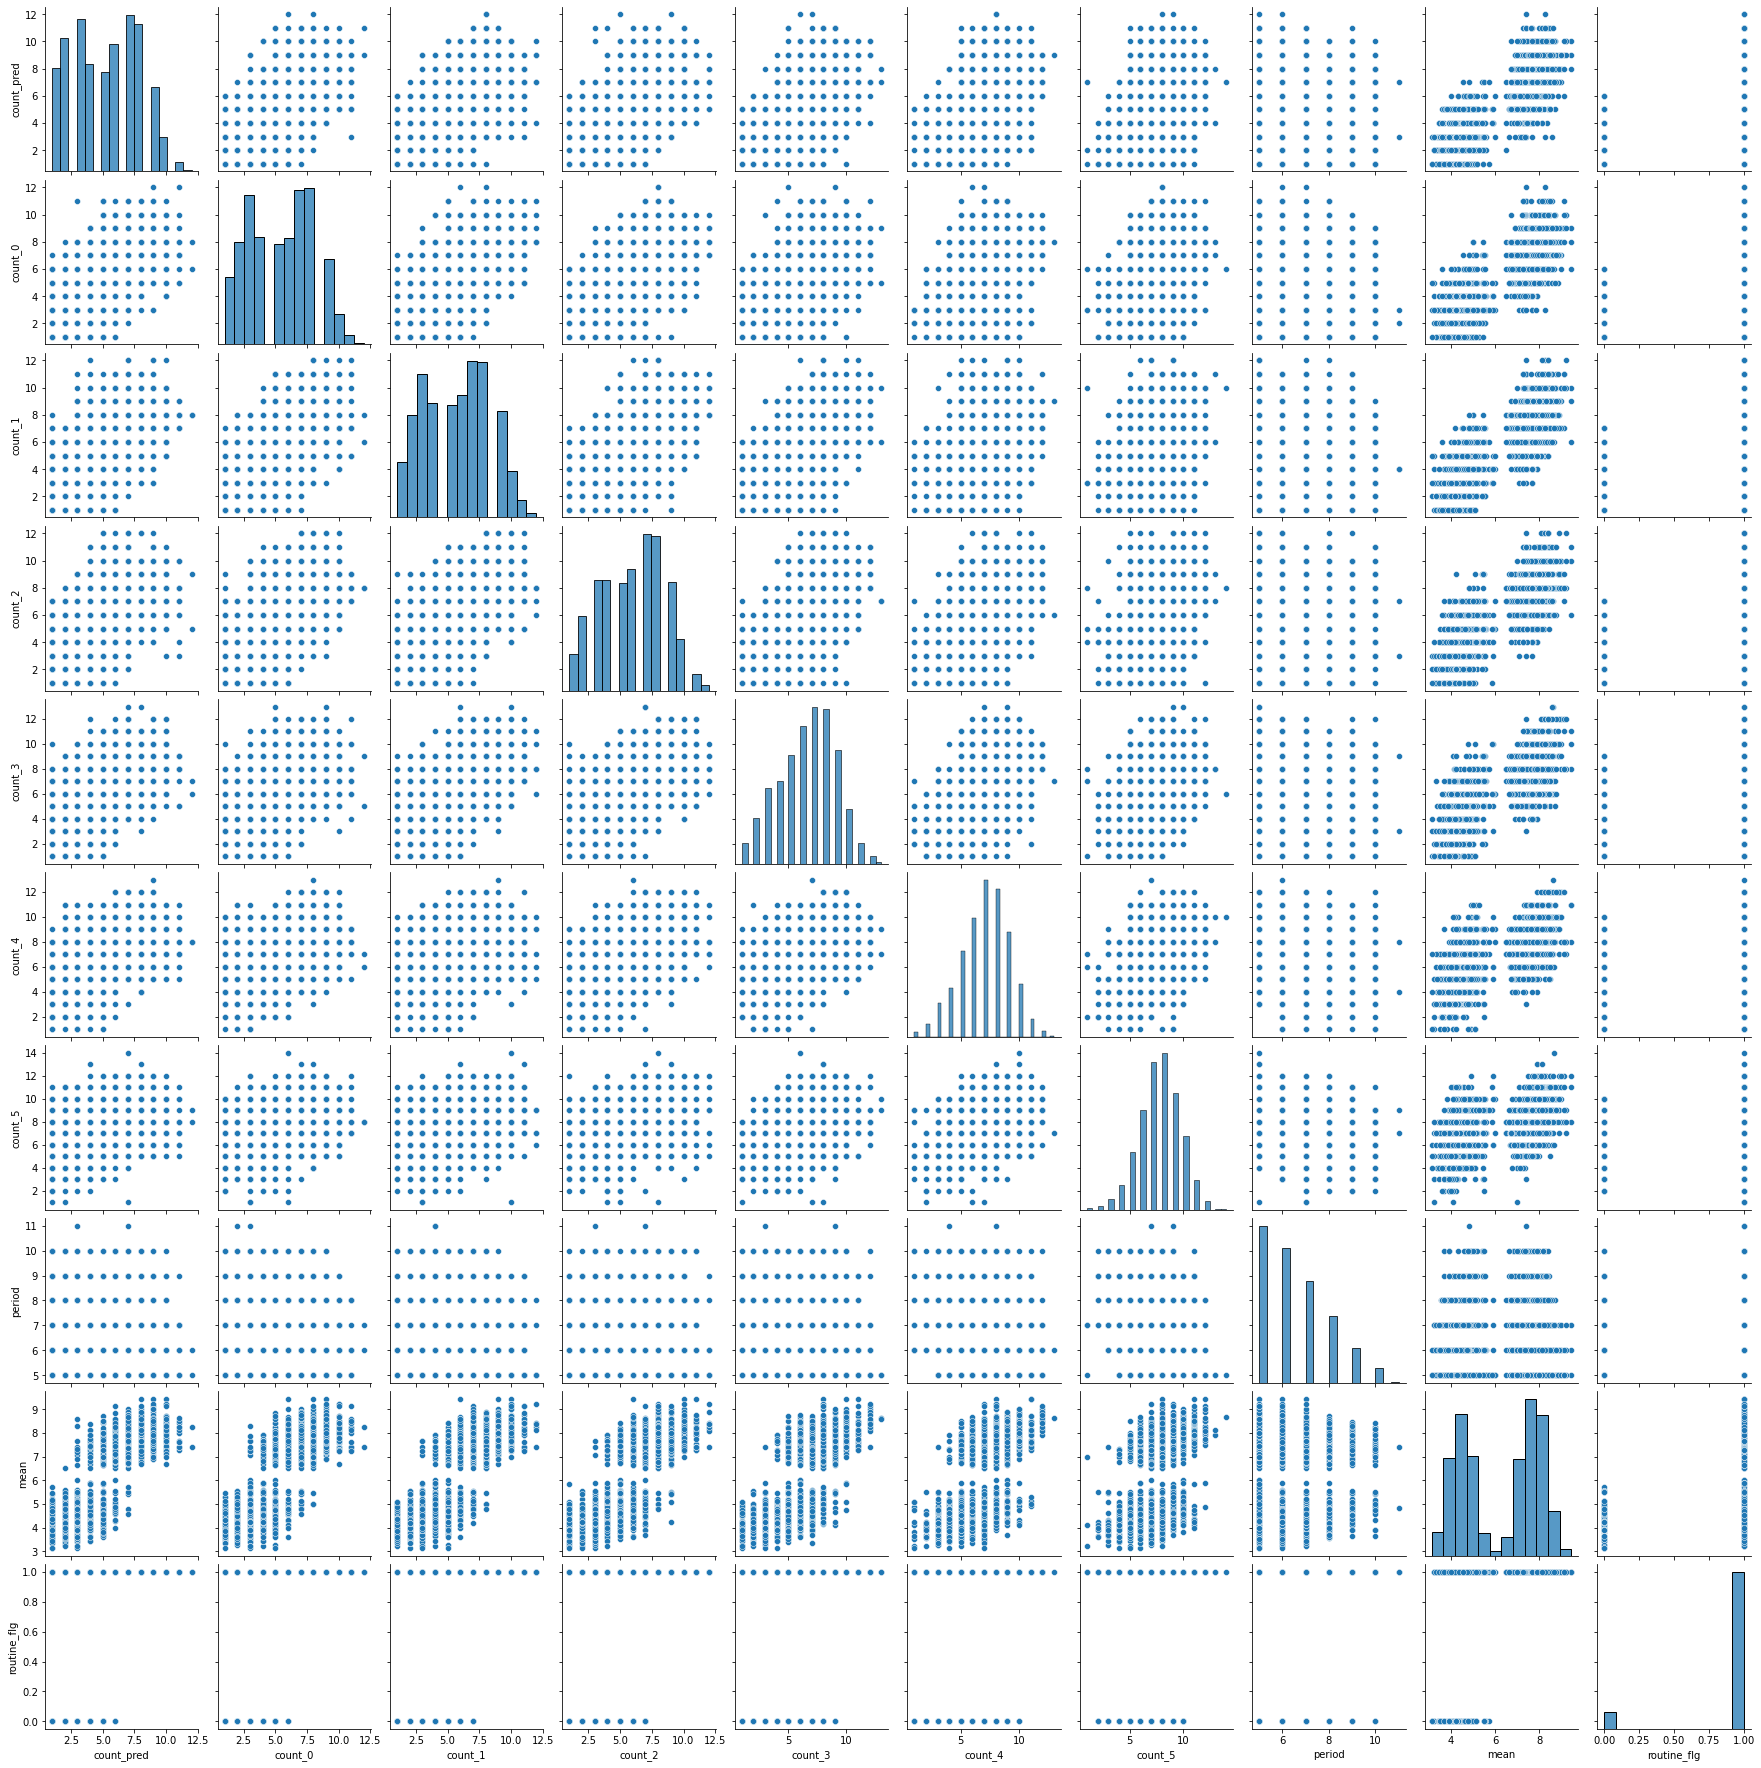

In [23]:
sns.pairplot(predict_data_v)

C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


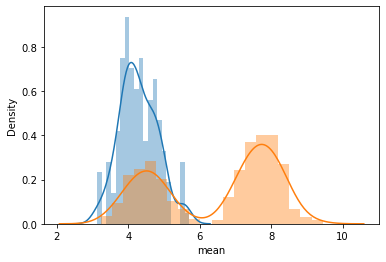

In [24]:
colname = 'routine_flg'
vcolname = 'mean'
val = sorted(predict_data_v[colname].unique())
bins = 20

for i in val:
   sns.distplot(predict_data_v.loc[predict_data_v[colname] == i][vcolname], bins=bins) 

C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


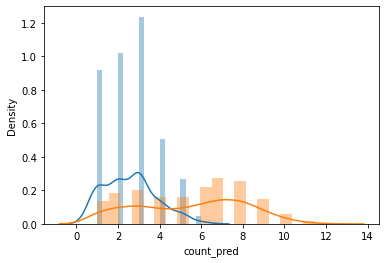

In [25]:
colname = 'routine_flg'
vcolname = 'count_pred'
val = sorted(predict_data_v[colname].unique())
bins = 20

for i in val:
   sns.distplot(predict_data_v.loc[predict_data_v[colname] == i][vcolname], bins=bins) 

C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

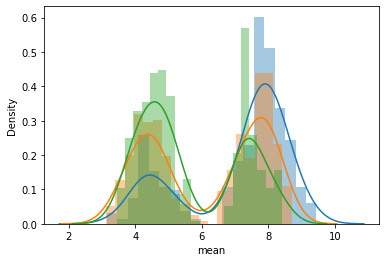

In [26]:
colname = 'campaign_id'
vcolname = 'mean'
val = sorted(predict_data_v[colname].unique())
bins = 20

for i in val:
   sns.distplot(predict_data_v.loc[predict_data_v[colname] == i][vcolname], bins=bins)

C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YusukeSato\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

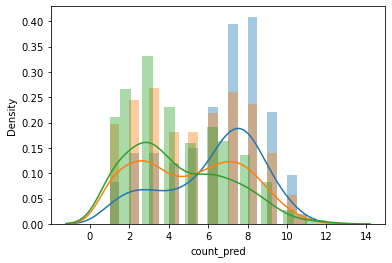

In [27]:
colname = 'campaign_id'
vcolname = 'count_pred'
val = sorted(predict_data_v[colname].unique())
bins = 20

for i in val:
   sns.distplot(predict_data_v.loc[predict_data_v[colname] == i][vcolname], bins=bins)

<AxesSubplot:xlabel='mean', ylabel='count_pred'>

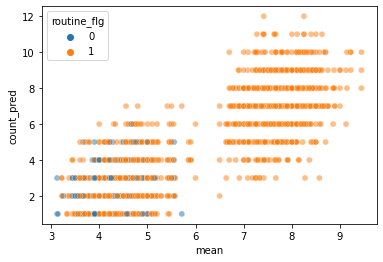

In [28]:
sns.scatterplot(data = predict_data_v,
               x = 'mean',
               y = 'count_pred',
               hue = 'routine_flg',
               alpha = 0.5)

<AxesSubplot:xlabel='mean', ylabel='count_pred'>

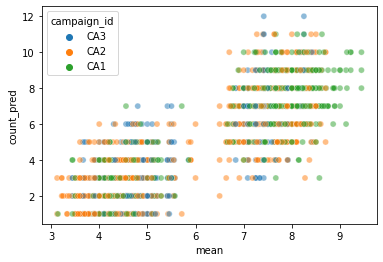

In [29]:
sns.scatterplot(data = predict_data_v,
               x = 'mean',
               y = 'count_pred',
               hue = 'campaign_id',
               alpha = 0.5)

In [30]:
pd.crosstab(index = predict_data_v.routine_flg,
            columns = predict_data_v.gender,
            values = predict_data_v.routine_flg,
            aggfunc = 'count',
            normalize = 'index')

gender,F,M
routine_flg,,
0,0.509091,0.490909
1,0.460638,0.539362


In [31]:
pd.crosstab(index = predict_data_v.routine_flg,
            columns = predict_data_v.campaign_id,
            values = predict_data_v.routine_flg,
            aggfunc = 'count',
            normalize = 'index')

campaign_id,CA1,CA2,CA3
routine_flg,,,
0,0.145455,0.539394,0.315152
1,0.255042,0.475602,0.269356


In [32]:
pd.crosstab(index = predict_data_v.routine_flg,
            columns = predict_data_v.class_name,
            values = predict_data_v.routine_flg,
            aggfunc = 'count',
            normalize = 'index')

class_name,オールタイム,デイタイム,ナイト
routine_flg,,,
0,0.539394,0.296970,0.163636
1,0.507482,0.222511,0.270007


# ノック39 : 寄与変数

In [33]:
coef = pd.DataFrame({'feature_names':X.columns, 'coefficient':model.coef_})
coef

,feature_names,coefficient
0,count_0,0.315684
1,count_1,0.176405
2,count_2,0.181840
3,count_3,0.181428
4,count_4,0.099649
5,count_5,0.064389
6,period,0.054022


In [34]:
coef_2 = pd.DataFrame({'feature_names':X2.columns, 'coefficient':model_2.coef_})
coef_2

,feature_names,coefficient
0,count_0,-0.080121
1,count_1,-0.165922
2,count_2,-0.152766
3,count_3,-0.133648
4,count_4,-0.146463
5,count_5,-0.150413
6,period,-0.415063
7,mean,2.169540
8,routine_flg,0.088538
9,gender_M,-0.011060


# ノック40 : 予測

In [35]:
x1 = [3,4,4,6,8,7,8]
x2 = [2,2,3,3,4,6,8]
x_pred = [x1, x2]

In [36]:
model.predict(x_pred)

array([3.8930984, 2.0354973])

In [37]:
uselog_months.to_csv('use_log_months.csv', index=False)